Name: Anushka Khandelwal

Roll: E1-06

Branch: CSE(AIML)

# DL LAB-1

Write a program to implement:
1. vanilla gradient descent
2. momentum based gradient descent

Consider two points (2, 0.3) and (6, 0.8)

Approximate these two points by using above mentioned algorithm also plot the approximation plot.

In [1]:
import math

def sig(num):
  # 1/(1 + e^(-x))
  return 1/(1 + math.exp(-num))

def calc(x, w):
  z = x*w[0] + w[1];
  # z is currently the net result
  # we will calculate with activation sigmoid function now
  z = sig(z)
  return z

# change in weight i.e. derivative of sigmoid function
def cw(x, y, w):
  y1 = calc(x,w)
  dw = (y1 - y)*(1 - y1)*x
  return dw

# calculate total error
def totalError(y1, y):
  z = 0
  for i in range(len(y)):
    z += (y[i] - y1[i])**2
  z = z/len(y)
  return round(z,4)

## 1. Vanilla Gradient Descent
Steps to train the node:
1. calculate y1 (the output we calculated)
2. calculate change in weight by gradient descent formula
  - i.e: dw = (y1 - y) * y1 * (1 - y1) * xi
3. adjust new weights
  - wi+1 = wi - ita*dw

loop these 3 steps 1000 times

In [3]:
x = [2, 6] # input
y = [0.3, 0.8] # output
w = [1, 0] # initial weights

In [4]:
epoch = 1000
ita = 1
y1Arr = []
for i in range(epoch):
  y1Arr = []
  for i in x:
    y1 = calc(i,w)
    y1Arr.append(y1)
  dw = 0
  for i in range(len(x)):
    dw += (y1Arr[i] - y[i]) * y1Arr[i] * (1 - y1Arr[i]) * x[i]
  nw = []
  for i in range(len(w)):
    temp = w[i] - ita*dw
    nw.append(temp)
  w = nw
print('calculated output: ',y1Arr)
print('total error: ', totalError(y1Arr, y))
print("new weights: ", nw)

calculated output:  [0.4235467057202685, 0.6488820539481949]
total error:  0.0191
new weights:  [0.3768397168174921, -0.6231602831825076]


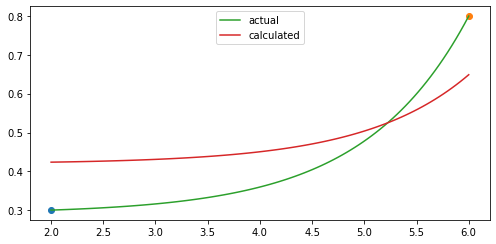

In [5]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

def draw_curve(p1, p2):
   a = (p2[1] - p1[1]) / (np.cosh(p2[0]) - np.cosh(p1[0]))
   b = p1[1] - a * np.cosh(p1[0])
   x = np.linspace(p1[0], p2[0], 100)
   y = a * np.cosh(x) + b
   return x, y

# actual point
p1 = [x[0], y[0]]
p2 = [x[1], y[1]]
plt.plot(p1[0], p1[1], 'o')
plt.plot(p2[0], p2[1], 'o')

cx, cy = draw_curve(p1, p2)
plt.plot(cx, cy, label="actual")

# the curve we have
py1 = [x[0], y1Arr[0]]
py2 = [x[1], y1Arr[1]]
cx, cy = draw_curve(py1, py2)
plt.plot(cx, cy, label="calculated")
leg = plt.legend(loc='upper center')
plt.show()

## 2. Momentum based
Steps to train the node:
1. calculate yDash (the output we calculated)
2. calculate change in weight by gradient descent formula
  - newUpdate = gamma*oldUpdate + ita*dw
  - i.e: dw = (y1 - y) * y1 * (1 - y1) * xi
3. adjust new weights
  - wi+1 = wi - newUpdate

loop these 3 steps 1000 times

In [6]:
# reset 
x = [2, 6] # input
y = [0.3, 0.8] # output
w = [1, -0.5] # initial weights

In [7]:
epoch = 1000
ita = 1
gamma = 0.1
y1Arr = []
update = 0
for i in range(epoch):
  y1Arr = []
  for i in x:
    y1 = calc(i,w)
    y1Arr.append(y1)
  dw = 0
  for i in range(len(x)):
    dw += (y1Arr[i] - y[i]) * y1Arr[i] * (1 - y1Arr[i]) * x[i]

  newUpdate = gamma*update + ita*dw
  nw = []
  for i in range(len(w)):
    temp = w[i] - newUpdate
    nw.append(temp)
  w = nw
print('calculated output: ',y1Arr)
print('total error: ', totalError(y1Arr, y))
print("new weights: ", nw)

calculated output:  [0.415961157860009, 0.7699667709285674]
total error:  0.0072
new weights:  [0.36244871922051797, -1.1375512807794836]


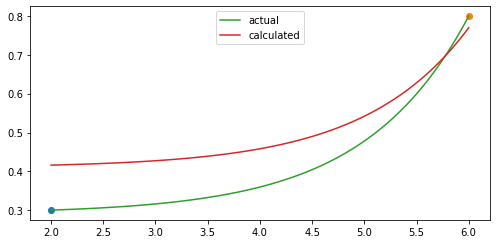

In [8]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

def draw_curve(p1, p2):
   a = (p2[1] - p1[1]) / (np.cosh(p2[0]) - np.cosh(p1[0]))
   b = p1[1] - a * np.cosh(p1[0])
   x = np.linspace(p1[0], p2[0], 100)
   y = a * np.cosh(x) + b
   return x, y

# actual point
p1 = [x[0], y[0]]
p2 = [x[1], y[1]]
plt.plot(p1[0], p1[1], 'o')
plt.plot(p2[0], p2[1], 'o')

cx, cy = draw_curve(p1, p2)
plt.plot(cx, cy, label="actual")

# the curve we have
py1 = [x[0], y1Arr[0]]
py2 = [x[1], y1Arr[1]]
cx, cy = draw_curve(py1, py2)
plt.plot(cx, cy, label="calculated")
leg = plt.legend(loc='upper center')
plt.show()